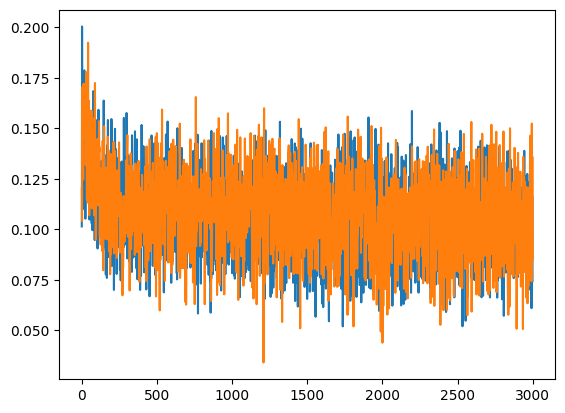

In [19]:
import numpy as np
import matplotlib.pyplot as plt
data1 = np.genfromtxt('Tribometer_data\DATA\OA-10_10N_100mms_test4_May8_reported_CoF.csv', delimiter=',', skip_header=1)
data2 = np.genfromtxt('datos2.txt', delimiter=',')
plt.plot(data1)
plt.plot(np.linspace(0,len(data1),len(data2)),data2)


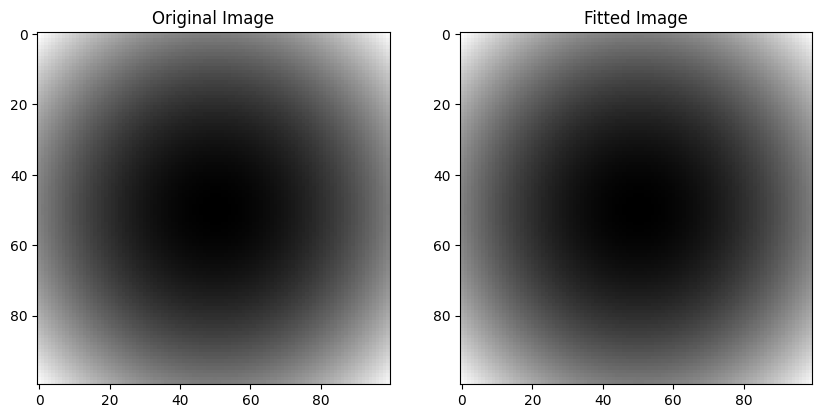

[ 1.00000000e+00 -2.00000000e-02  2.00000000e-04 -2.00000000e-02
 -1.32348898e-23  2.00000000e-04]


In [9]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt


def fit_image_to_polynomial(image, degree):
	# Step 1 & 2: Flatten the 2D array and generate meshgrid for coordinates
	y, x = np.indices(image.shape)
	x = x.flatten()
	y = y.flatten()
	z = image.flatten()  # Flatten the image array

	# Polynomial model function
	def poly_model(coeffs, x, y, degree, z=None):
		idx = 0
		model = np.zeros_like(x, dtype=np.float64)
		for i in range(degree + 1):
			for j in range(degree + 1 - i):
				model += coeffs[idx] * (x ** i) * (y ** j)
				idx += 1
		return model - z if z is not None else model

	# Number of coefficients for a given degree
	def num_coeffs(degree):
		return (degree + 1) * (degree + 2) // 2

	# Step 4: Fit polynomial
	initial_guess = np.zeros(num_coeffs(degree))
	res = least_squares(poly_model, initial_guess, args=(x, y, degree, z))

	# Step 5: Evaluate polynomial
	fitted_image = poly_model(res.x, x, y, degree).reshape(image.shape)

	return fitted_image, res.x

def create_paraboloid_image(height, width, scale=1):
    # Generate x and y coordinates
    y, x = np.ogrid[-height//2:height//2, -width//2:width//2]
    # Calculate z values for the paraboloid
    z = scale * (x**2 + y**2)
    # Normalize z values to the range [0, 1] for imaging purposes
    z_normalized = (z - z.min()) / (z.max() - z.min())
    return z_normalized

# Example usage
image = np.random.rand(100, 100)  # Example 2D numpy array
degree = 2  # Degree of the polynomial

height, width = 100, 100
scale = 0.01
paraboloid_image = create_paraboloid_image(height, width, scale)
fitted_image, coeffs = fit_image_to_polynomial(paraboloid_image, degree)
# Plot original and fitted image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(paraboloid_image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(fitted_image, cmap='gray')
ax[1].set_title('Fitted Image')
plt.show()
print(coeffs)